In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re

# get the files in the order
files = os.listdir('logging')
# Sort the files by number.
# Remove everything that is not a number
files = sorted(files, key=lambda x: int(re.sub('\D', '', x)))
files

<>:12: SyntaxWarning: invalid escape sequence '\D'
<>:12: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_73862/3549021176.py:12: SyntaxWarning: invalid escape sequence '\D'
  files = sorted(files, key=lambda x: int(re.sub('\D', '', x)))


['log1.csv',
 'log2.csv',
 'log3.csv',
 'log4.csv',
 'log5.csv',
 'log6.csv',
 'log7.csv',
 'log8.csv',
 'log9.csv',
 'log10.csv',
 'log11.csv',
 'log12.csv',
 'log13.csv',
 'log14.csv',
 'log15.csv',
 'log16.csv',
 'log17.csv',
 'log18.csv',
 'log19.csv',
 'log20.csv',
 'log21.csv',
 'log22.csv',
 'log23.csv',
 'log24.csv',
 'log25.csv']

In [60]:
def get_stats(id):
    # Get the files in the logging directory
    metrics = {
        'accuracy': [],
        'f1': [],
        'kappa': [],
        'roc_auc': []
    }
    for f in files:
        print(f)
        if f.endswith('.csv'):
            # Load the data
            data = pd.read_csv('logging/' + f)
            # Get the metrics
            metrics['accuracy'].append(data.loc[id, 'accuracy'])
            print(data.loc[id, 'accuracy'])
            metrics['f1'].append(data.loc[id, 'f1'])
            metrics['kappa'].append(data.loc[id, 'kappa'])
            metrics['roc_auc'].append(data.loc[id, 'roc_auc'])
    return metrics

log1.csv


0.0965
log2.csv
0.2631
log3.csv
0.3716
log4.csv
0.3767
log5.csv
0.3867
log6.csv
0.3756
log7.csv
0.3908
log8.csv
0.3806
log9.csv
0.3878
log10.csv
0.4072
log11.csv
0.4089
log12.csv
0.4319
log13.csv
0.417
log14.csv
0.4368
log15.csv
0.4238
log16.csv
0.4207
log17.csv
0.4204
log18.csv
0.4358
log19.csv
0.4328
log20.csv
0.445
log21.csv
0.4452
log22.csv
0.4372
log23.csv
0.4408
log24.csv
0.4436
log25.csv
0.4387


<Axes: title={'center': 'Model Performance'}, xlabel='Rounds', ylabel='Score'>

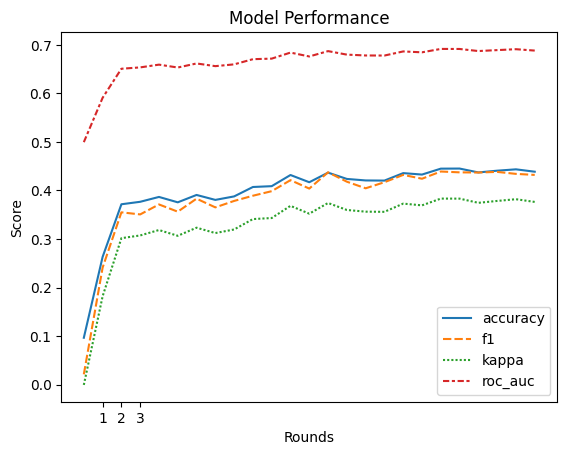

In [61]:
# Create a line plot with four lines    
data = get_stats(0)
fig, ax = plt.subplots()
ax.set_title('Model Performance')
ax.set_xlabel('Rounds')
ax.set_ylabel('Score')
ax.set_xticks(np.arange(1, len(data), 1))
ax.legend(['accuracy', 'kappa', 'f1', 'roc_auc'])
sns.lineplot(data=data, ax=ax)

In [62]:
data

{'accuracy': [0.0965,
  0.2631,
  0.3716,
  0.3767,
  0.3867,
  0.3756,
  0.3908,
  0.3806,
  0.3878,
  0.4072,
  0.4089,
  0.4319,
  0.417,
  0.4368,
  0.4238,
  0.4207,
  0.4204,
  0.4358,
  0.4328,
  0.445,
  0.4452,
  0.4372,
  0.4408,
  0.4436,
  0.4387],
 'f1': [0.0211510731018379,
  0.2410166350215219,
  0.3549581498054904,
  0.350685093555425,
  0.3712350012462456,
  0.3563257717097917,
  0.3831272188598413,
  0.3651915743643385,
  0.3784635595812308,
  0.3891829833836737,
  0.3985761503656184,
  0.4212945074048833,
  0.4039336423106461,
  0.4374565793192227,
  0.4181177643175845,
  0.4045078697423941,
  0.4170413841132188,
  0.4321306958042889,
  0.424231799325458,
  0.4391170950498779,
  0.4373782867265876,
  0.437006412147183,
  0.4383185550023519,
  0.4342336306493699,
  0.4320832054227532],
 'kappa': [-0.0007168728175883,
  0.1818997864499102,
  0.3017200963844642,
  0.3073426064143742,
  0.3185146442728325,
  0.3066049791859354,
  0.3233253655958499,
  0.3122468857948049,